In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
import cv2
from matplotlib import pyplot as plt

In [2]:
!ls

cascade.xml  dartcascade  DART_VY_F1_Score.csv	opencv_traincascade
Dart_1000    dart_img	  makefile		Task2.ipynb
Dart_500     dart.json	  negatives		TRP.png
dart.bmp     dart.vec	  opencv_createsamples


In [3]:
dart_cascade_500 = cv2.CascadeClassifier('Dart_500/cascade.xml')
dart_cascade_1000 = cv2.CascadeClassifier('Dart_1000/cascade.xml')


In [4]:
dart = pd.read_json('dart.json')

In [5]:
dart = dart.transpose()[['filename','regions']].reset_index()

[[124, 27, 189, 190]]


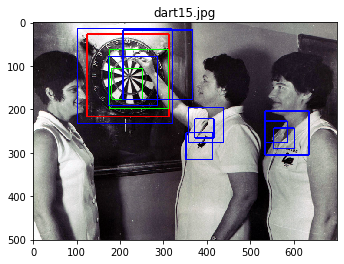

[[97, 83, 172, 167]]
[[97, 83, 172, 167], [961, 82, 174, 155]]


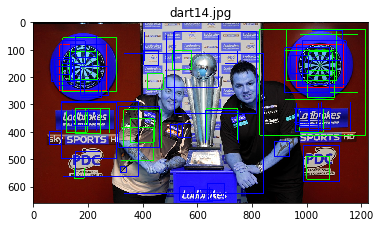

[[232, 100, 211, 178]]


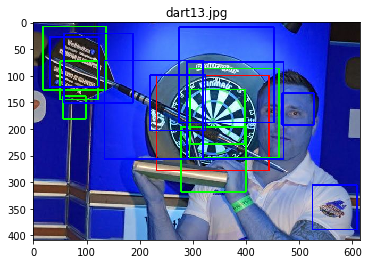

[[135, 50, 111, 190]]


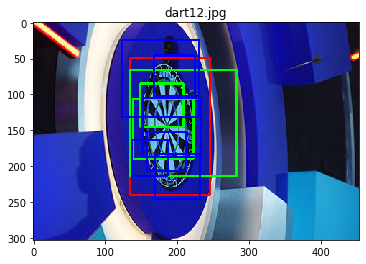

[[165, 92, 87, 94]]


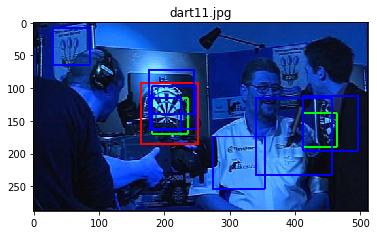

[[65, 91, 150, 139]]
[[65, 91, 150, 139], [557, 109, 101, 125]]
[[65, 91, 150, 139], [557, 109, 101, 125], [901, 140, 65, 89]]


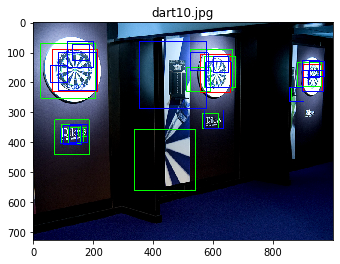

[[154, 11, 309, 307]]


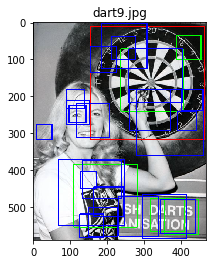

[[802, 188, 187, 179]]
[[802, 188, 187, 179], [38, 236, 114, 124]]


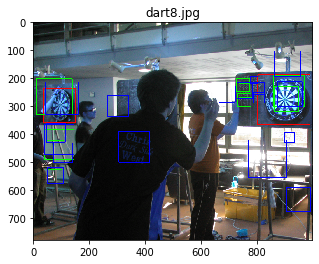

[[208, 146, 246, 201]]


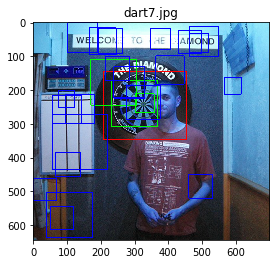

[[204, 103, 88, 92]]


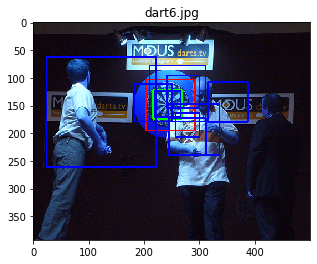

[[396, 125, 187, 156]]


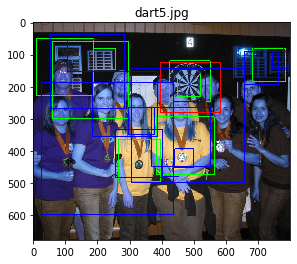

[[144, 60, 293, 290]]


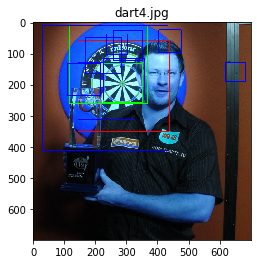

[[302, 136, 109, 105]]


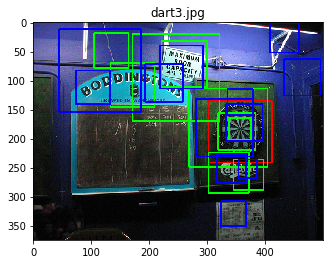

[[87, 71, 125, 133]]


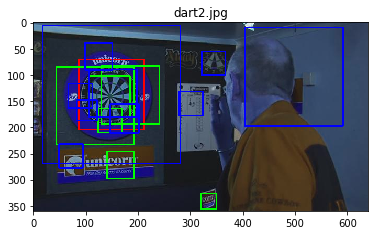

[[148, 101, 285, 256]]


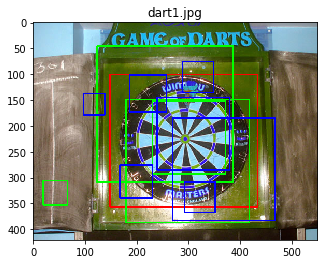

[[420, 6, 213, 221]]


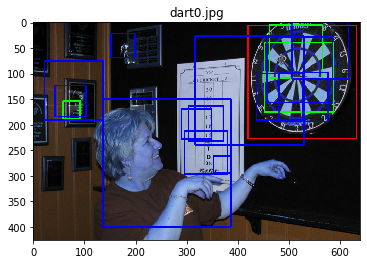

0                                                  1  \
0   dart15.jpg                              [[124, 27, 189, 190]]   
1   dart14.jpg          [[97, 83, 172, 167], [961, 82, 174, 155]]   
2   dart13.jpg                             [[232, 100, 211, 178]]   
3   dart12.jpg                              [[135, 50, 111, 190]]   
4   dart11.jpg                                [[165, 92, 87, 94]]   
5   dart10.jpg  [[65, 91, 150, 139], [557, 109, 101, 125], [90...   
6    dart9.jpg                              [[154, 11, 309, 307]]   
7    dart8.jpg        [[802, 188, 187, 179], [38, 236, 114, 124]]   
8    dart7.jpg                             [[208, 146, 246, 201]]   
9    dart6.jpg                               [[204, 103, 88, 92]]   
10   dart5.jpg                             [[396, 125, 187, 156]]   
11   dart4.jpg                              [[144, 60, 293, 290]]   
12   dart3.jpg                             [[302, 136, 109, 105]]   
13   dart2.jpg                               [[87, 71, 125, 133]]   
14   dart1.jpg                             [[148, 101, 285, 256]]   
15   dart0.jpg                               [[420, 6, 213, 221]]   

                                                    2  \
0           [[181, 106, 71, 71], [176, 63, 135, 135]]   
1   [[1007, 108, 86, 86], [134, 108, 101, 101], [8...   
2   [[56, 138, 43, 43], [18, 8, 119, 119], [50, 73...   
3   [[149, 85, 60, 60], [139, 106, 84, 84], [135, ...   
4            [[182, 116, 54, 54], [412, 138, 52, 52]]   
5   [[26, 70, 183, 183], [512, 151, 80, 80], [880,...   
6   [[237, 72, 169, 169], [388, 36, 66, 66], [110,...   
7   [[726, 202, 47, 47], [858, 191, 111, 111], [12...   
8   [[302, 212, 55, 55], [170, 110, 135, 135], [23...   
9                                [[216, 122, 52, 52]]   
10  [[450, 161, 70, 70], [188, 81, 67, 67], [683, ...   
11        [[225, 132, 126, 126], [118, 12, 250, 250]]   
12  [[337, 164, 39, 39], [105, 19, 59, 59], [221, ...   
13  [[107, 102, 78, 78], [130, 83, 111, 111], [44,...   
14  [[230, 152, 141, 141], [123, 46, 263, 263], [1...   
15  [[58, 154, 34, 34], [453, 40, 135, 135], [462,...   

                                                    3  
0   [[207, 18, 160, 160], [174, 79, 112, 112], [10...  
1   [[701, 105, 47, 47], [404, 103, 54, 54], [136,...  
2   [[31, 28, 93, 93], [58, 21, 130, 130], [274, 9...  
3   [[168, 46, 57, 57], [124, 25, 107, 107], [152,...  
4   [[30, 9, 56, 56], [178, 116, 48, 48], [177, 72...  
5   [[919, 161, 48, 48], [84, 101, 126, 126], [132...  
6   [[10, 277, 41, 41], [391, 242, 51, 51], [97, 2...  
7   [[777, 193, 26, 26], [664, 228, 58, 58], [862,...  
8   [[564, 163, 50, 50], [74, 202, 49, 49], [346, ...  
9   [[257, 164, 43, 43], [219, 124, 47, 47], [24, ...  
10  [[746, 92, 52, 52], [437, 148, 98, 98], [107, ...  
11  [[225, 116, 134, 134], [236, 38, 67, 67], [403...  
12  [[335, 115, 44, 44], [218, 40, 74, 74], [408, ...  
13  [[322, 56, 45, 45], [99, 39, 52, 52], [83, 148...  
14  [[97, 138, 41, 41], [239, 145, 140, 140], [288...  
15  [[152, 22, 47, 47], [458, 29, 128, 128], [43, ...

In [6]:
file_name = []
BOX_1 = []
BOX_2 = []
BOX_3 = []
for x_1 in range(dart.shape[0]):
    data = dart['regions'][x_1]
    img = cv2.imread("dart_img/"+dart['filename'][x_1])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dart_500 = dart_cascade_500.detectMultiScale(gray, 1.1, 1)
    dart_1000 = dart_cascade_1000.detectMultiScale(gray, 1.1, 1)
    i=0
    box1 = []
    box2 = []
    box3 = []
    for y_1 in range(0,len(data)):
        x1=data[y_1]['shape_attributes']['x']
        y1=data[y_1]['shape_attributes']['y']
        w1=data[y_1]['shape_attributes']['width']
        h1=data[y_1]['shape_attributes']['height']
        box1.append([x1,y1,w1,h1])
        print(box1)
        img = cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
        data_1 = data[y_1]['shape_attributes']
        data_2 = dart['filename'][x_1]
        
    for (x,y,w,h) in dart_500:
        img =cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box2.append([x,y,w,h])
    for (x,y,w,h) in dart_1000:
        img =cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        box3.append([x,y,w,h])
    plt.imshow(img)
    plt.title(dart['filename'][x_1])
    plt.show()
    file_name.append(dart['filename'][x_1])
    BOX_1.append(box1)
    BOX_2.append(box2)
    BOX_3.append(box3)
a = pd.DataFrame([file_name, BOX_1, BOX_2,BOX_3]).transpose()
a
#Final_data = pd.concat([data_FN,data_FC],1)[[0,'height', 'width' ,'x', 'y']]

In [7]:
a.columns = ['filename', 'GT', 'PT_500','PT_1000']
a

filename                                                 GT  \
0   dart15.jpg                              [[124, 27, 189, 190]]   
1   dart14.jpg          [[97, 83, 172, 167], [961, 82, 174, 155]]   
2   dart13.jpg                             [[232, 100, 211, 178]]   
3   dart12.jpg                              [[135, 50, 111, 190]]   
4   dart11.jpg                                [[165, 92, 87, 94]]   
5   dart10.jpg  [[65, 91, 150, 139], [557, 109, 101, 125], [90...   
6    dart9.jpg                              [[154, 11, 309, 307]]   
7    dart8.jpg        [[802, 188, 187, 179], [38, 236, 114, 124]]   
8    dart7.jpg                             [[208, 146, 246, 201]]   
9    dart6.jpg                               [[204, 103, 88, 92]]   
10   dart5.jpg                             [[396, 125, 187, 156]]   
11   dart4.jpg                              [[144, 60, 293, 290]]   
12   dart3.jpg                             [[302, 136, 109, 105]]   
13   dart2.jpg                               [[87, 71, 125, 133]]   
14   dart1.jpg                             [[148, 101, 285, 256]]   
15   dart0.jpg                               [[420, 6, 213, 221]]   

                                               PT_500  \
0           [[181, 106, 71, 71], [176, 63, 135, 135]]   
1   [[1007, 108, 86, 86], [134, 108, 101, 101], [8...   
2   [[56, 138, 43, 43], [18, 8, 119, 119], [50, 73...   
3   [[149, 85, 60, 60], [139, 106, 84, 84], [135, ...   
4            [[182, 116, 54, 54], [412, 138, 52, 52]]   
5   [[26, 70, 183, 183], [512, 151, 80, 80], [880,...   
6   [[237, 72, 169, 169], [388, 36, 66, 66], [110,...   
7   [[726, 202, 47, 47], [858, 191, 111, 111], [12...   
8   [[302, 212, 55, 55], [170, 110, 135, 135], [23...   
9                                [[216, 122, 52, 52]]   
10  [[450, 161, 70, 70], [188, 81, 67, 67], [683, ...   
11        [[225, 132, 126, 126], [118, 12, 250, 250]]   
12  [[337, 164, 39, 39], [105, 19, 59, 59], [221, ...   
13  [[107, 102, 78, 78], [130, 83, 111, 111], [44,...   
14  [[230, 152, 141, 141], [123, 46, 263, 263], [1...   
15  [[58, 154, 34, 34], [453, 40, 135, 135], [462,...   

                                              PT_1000  
0   [[207, 18, 160, 160], [174, 79, 112, 112], [10...  
1   [[701, 105, 47, 47], [404, 103, 54, 54], [136,...  
2   [[31, 28, 93, 93], [58, 21, 130, 130], [274, 9...  
3   [[168, 46, 57, 57], [124, 25, 107, 107], [152,...  
4   [[30, 9, 56, 56], [178, 116, 48, 48], [177, 72...  
5   [[919, 161, 48, 48], [84, 101, 126, 126], [132...  
6   [[10, 277, 41, 41], [391, 242, 51, 51], [97, 2...  
7   [[777, 193, 26, 26], [664, 228, 58, 58], [862,...  
8   [[564, 163, 50, 50], [74, 202, 49, 49], [346, ...  
9   [[257, 164, 43, 43], [219, 124, 47, 47], [24, ...  
10  [[746, 92, 52, 52], [437, 148, 98, 98], [107, ...  
11  [[225, 116, 134, 134], [236, 38, 67, 67], [403...  
12  [[335, 115, 44, 44], [218, 40, 74, 74], [408, ...  
13  [[322, 56, 45, 45], [99, 39, 52, 52], [83, 148...  
14  [[97, 138, 41, 41], [239, 145, 140, 140], [288...  
15  [[152, 22, 47, 47], [458, 29, 128, 128], [43, ...

In [13]:
export_csv = b.to_csv ('Result.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

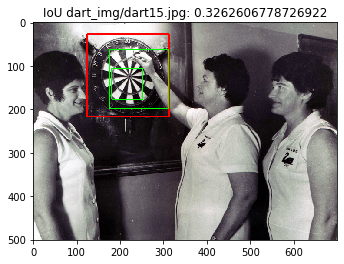

IoU:  0.3262606778726922
true positve rate: 1.0
F1_score: 1.0


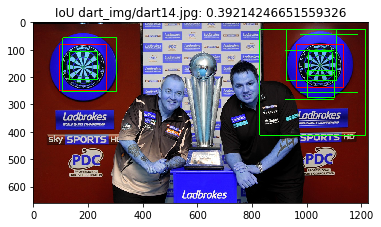

IoU:  0.39214246651559326
true positve rate: 1.0
F1_score: 0.33333333333333337


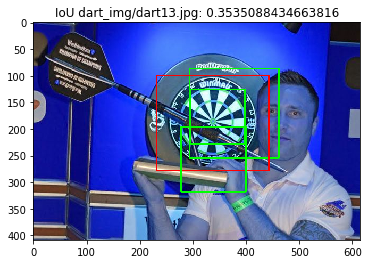

IoU:  0.3535088434663816
true positve rate: 1.0
F1_score: 0.6666666666666666


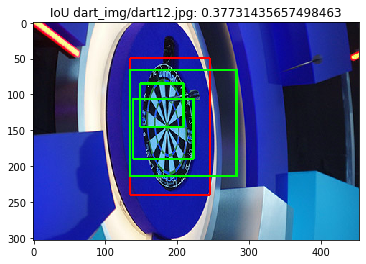

IoU:  0.37731435657498463
true positve rate: 1.0
F1_score: 1.0


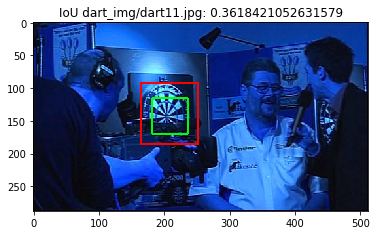

IoU:  0.3618421052631579
true positve rate: 1.0
F1_score: 0.6666666666666666


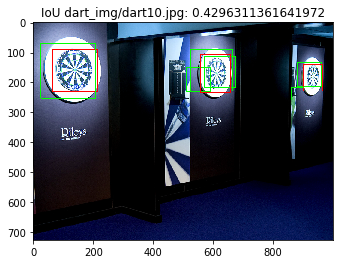

IoU:  0.4296311361641972
true positve rate: 0.8333333333333334
F1_score: 0.2439024390243902


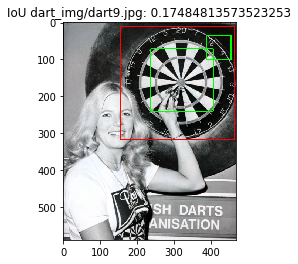

IoU:  0.17484813573523253
true positve rate: 0.5
F1_score: 0.3333333333333333


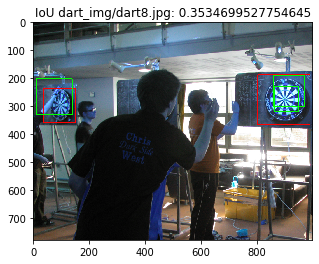

IoU:  0.3534699527754645
true positve rate: 1.0
F1_score: 0.2857142857142857


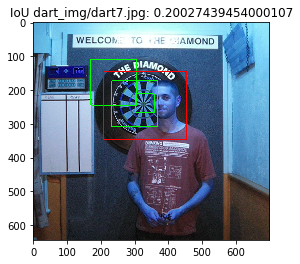

IoU:  0.20027439454000107
true positve rate: 0.6666666666666666
F1_score: 0.8


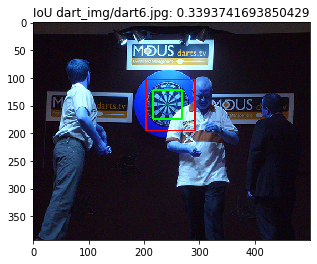

IoU:  0.3393741693850429
true positve rate: 1.0
F1_score: 1.0


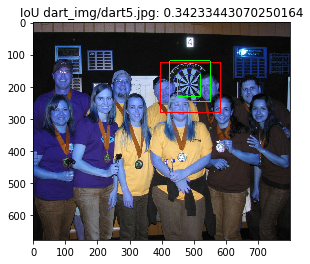

IoU:  0.34233443070250164
true positve rate: 1.0
F1_score: 0.4


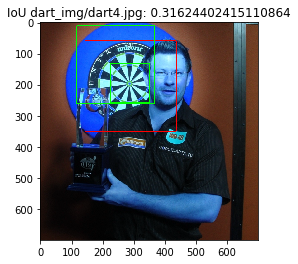

IoU:  0.31624402415110864
true positve rate: 1.0
F1_score: 1.0


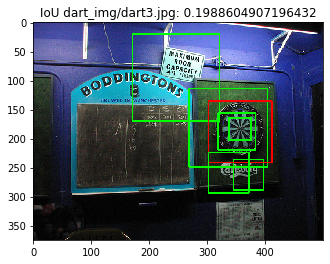

IoU:  0.1988604907196432
true positve rate: 0.5
F1_score: 0.5


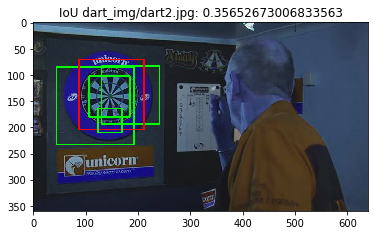

IoU:  0.35652673006833563
true positve rate: 1.0
F1_score: 0.8


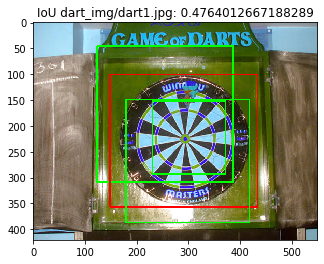

IoU:  0.4764012667188289
true positve rate: 1.0
F1_score: 0.8571428571428571


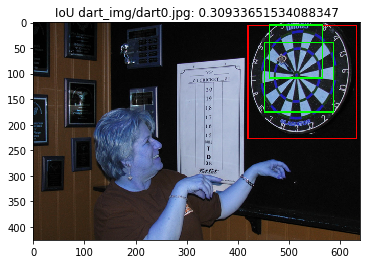

IoU:  0.30933651534088347
true positve rate: 1.0
F1_score: 0.8


In [10]:
def intersectionOverUnion(name,trackedBoxes,curBoxes,threshold):
    img = cv2.imread(name)
    IoUMatrix = np.empty((trackedBoxes.shape[0],curBoxes.shape[0]))
    IOU_YO = []
    T_P=0
    F_P=0
    F_N=0
    IOU_VALUE = 0
    for i in range(trackedBoxes.shape[0]):
        
        for j in range(curBoxes.shape[0]):
            x,y,w,h = trackedBoxes[i,:]
            dx, dy, dw, dh = curBoxes[j,:]
            xA = max(x, dx)
            yA = max(y, dy)
            xB = min(x + w, dx + dw)
            yB = min(y + h, dy + dh)
            intersection = max(0, xB - xA + 1) * max(0, yB - yA + 1)
            boxA = (x + w - x + 1) * (y + h - y + 1)
            boxB = (dx + dw - dx + 1) * (dy + dh - dy + 1)
            ASD = boxA + boxB - intersection
            IoU = intersection/ASD 
            if IoU != 0:
                if IoU>threshold:
                    IOU_VALUE += IoU
                    T_P +=1
                    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
                    img = cv2.rectangle(img,(dx,dy),(dx+dw,dy+dh),(0,255,0),2) 
                else:
                    F_N +=1
                    IOU_VALUE += IoU
                    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
                    img = cv2.rectangle(img,(dx,dy),(dx+dw,dy+dh),(0,255,0),2) 
            else:
                F_P+=1
        #IOU_YO.append(IoU)
        
    plt.imshow(img)
    plt.title("IoU "+ name + ": " + (str)((IOU_VALUE)/(T_P+F_P)))
    plt.show()
    print('IoU: ', (IOU_VALUE)/(T_P+F_P))
    print('Precision:', (T_P)/(T_P+F_P))
    
    print('TPR:', (T_P)/(T_P+F_N))
    return ((T_P)/(T_P+F_P)),((T_P)/(T_P+F_N)),((IOU_VALUE)/(T_P+F_P))
Z =[]
Z_1=[]
Z_2=[]
Z_3 = []
for i in range(0,len(a)):
    threshold=0.1
    if(i==1):
        threshold=0.0039
    if(i==3):
        threshold=0.0092
    Precision, Recall ,IOU= intersectionOverUnion("dart_img/"+a['filename'][i],np.array(a['GT'][i]),np.array(a['PT_500'][i]),threshold)
    print('F1_score:', 2 * (float(Precision*Recall)/float(Precision+Recall)))
    F1_score=2 * (float(Precision*Recall)/float(Precision+Recall))
    Z.append(Precision)
    Z_1.append(Recall)
    Z_2.append(F1_score)
    Z_3.append(IOU)
a['IoU_500'] = Z_3
#a['Precision_1000'] = Z
#a['RECALL_1000'] = Z_1
a['F1_Score_500'] = Z_2

In [11]:
b = a[['filename','IoU_500','F1_Score_500', 'IoU_1000','F1_Score_1000']]

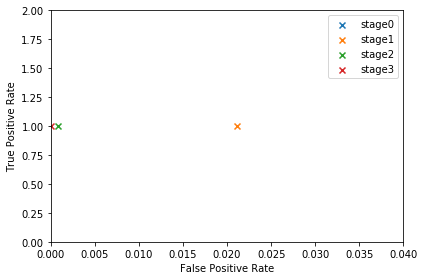

In [2]:
import matplotlib
import matplotlib.pyplot as plt

if __name__ == '__main__':
    ture_positive_rates = [1, 1, 1, 1]
    false_positive_rates = [1, 0.0211109, 0.000795262, 2.22455e-05]

    for index in range(len(false_positive_rates)):
        plt.scatter(false_positive_rates[index], ture_positive_rates[index], marker='x', label="stage"+str(index))


    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim(0, 0.04)
    plt.ylim(0, 2)
    plt.legend()
    plt.tight_layout()
    plt.savefig("plot.png")
    plt.show()

In [12]:
b

filename   IoU_500  F1_Score_500  IoU_1000  F1_Score_1000
0   dart15.jpg  0.326261      1.000000  0.487497       0.500000
1   dart14.jpg  0.392142      0.333333  0.255541       0.280000
2   dart13.jpg  0.353509      0.666667  0.318464       0.666667
3   dart12.jpg  0.377314      1.000000  0.204583       1.000000
4   dart11.jpg  0.361842      0.666667  0.390429       0.600000
5   dart10.jpg  0.429631      0.243902  0.299584       0.354839
6    dart9.jpg  0.174848      0.333333  0.106118       0.307692
7    dart8.jpg  0.353470      0.285714  0.148322       0.111111
8    dart7.jpg  0.200274      0.800000  0.091469       0.173913
9    dart6.jpg  0.339374      1.000000  0.233176       0.800000
10   dart5.jpg  0.342334      0.400000  0.149962       0.250000
11   dart4.jpg  0.316244      1.000000  0.183847       0.615385
12   dart3.jpg  0.198860      0.500000  0.208360       0.285714
13   dart2.jpg  0.356527      0.800000  0.186329       0.461538
14   dart1.jpg  0.476401      0.857143  0.134012       0.444444
15   dart0.jpg  0.309337      0.800000  0.257434       0.555556